# Basics of Marvin

In this notebook, you will learn the common core functionality across many of the Marvin Tools.  This includes the basics of accessing and handling MaNGA data from different locations, as well as a beginners guide of interacting with data via the core tools of Cubes and Maps.  Much of this information can be found in the [Getting Started section](https://sdss-marvin.readthedocs.io/en/stable/getting-started.html) of the Marvin documentation.  

## Table of Contents
- [Data Access Modes](#modes) <br>
- [Interacting with Data Content](#interaction) <br>
 - [Object Datamodels](#datamodel) <br>
 - [Extracting Data](#extract) <br> 
 - [Accessing Associated Objects](#associates)<br>
 - [Quality and Target Flags](#flags)<br>
 - [NSA and DAPall Metadata](#mixin)<br>
 - [Downloading Files](#download)<br>
- [Interacting with Spaxels](#spaxels)<br>

<a id="common"></a>
## Common Core Functionality 

Marvin Tools provides the core functionality for accessing MaNGA data with Marvin. At the lowest level they are class wrappers around data products or elements (datacubes, maps, and spaxels). Their purpose is to provide a more natural way to interact with the data, unconstrained by specific data storage architectures such as files or databases, or by data location such as a laptop or remote server.  

All Marvin Tools are built off a set of common core functionalities and features, and thus behave in very similar ways.  There are four main classes provided in Marvin: the ``Cube``, the ``RSS``, the ``Maps``, and the ``ModelCube``.
We will start by focusing on a Marvin Cube to demonstrate the common features and handling of Marvin Tools.  Everything discussed here also applies to any of the other available Marvin Tools listed above.   
  
Let's start by importing the Marvin Cube class.

In [42]:
from marvin.tools import Cube

You may see the info message `No release version set. Setting default to DR15`.  The default data release Marvin uses is DR15. For this tutorial, we will be using DR15 data so there is no need to do anything further.  In general, to change which release Marvin uses, we can use the Marvin `config.setRelease` method on the `config` object.   

In [8]:
from marvin import config

# set the release to DR17
config.setRelease("DR16")

Exception ignored in: <function MarvinToolsClass.__del__ at 0x7fa7e80e6310>
Traceback (most recent call last):
  File "/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/marvin/tools/core.py", line 253, in __del__
    self.close()
  File "/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/marvin/tools/core.py", line 240, in close
    if self.source_is_fits_hdulist:
AttributeError: 'Cube' object has no attribute 'source_is_fits_hdulist'


<a id="modes"></a>
### Data Access Modes

Let's instantiate our first cube, for galaxy with plate-IFU designation 8485-1901.  Each marvin tool takes a string id input and can one of: a string filepath and name, a plate-IFU designation, or a manga-ID designation.  Marvin will attempt to identify the input format and properly load the target data.

In [9]:
# instantiate a cube for 8485-1901
cube = Cube('8485-1901')
cube

<Marvin Cube (plateifu='8485-1901', mode='local', data_origin='db')>

Once instantiated, each marvin tool indicates a **mode** and a **data-origin**.  Note that `mode="local"` and  `data_origin="db"`.  This indicates that we have accessed the object from the SciServer-hosted DR17 MaNGA database.

What if we won't have the MaNGa data products for our target of interest?  We can specify the **plateifu** or **mangaid** of the target and Marvin will access it remotely.  In this case, you would see `mode="remote"` and `data_origin="api"`.  This indicates the cube has been remotely loaded using the built-in Marvin API. By specifying an input plateifu or mangaid, marvin will always first try to access the data locally, and then fall back to remote access.  Since we're accesing data hosted on SciServer, all data is local either in database or files. 

You can also explicitly load a file using the ``filename`` keyword argument.    

In [11]:
# Explicitly load a cube from a file on disk 
filename = '/home/idies/workspace/sdss_sas/dr16/manga/spectro/redux/v2_4_3/8485/stack/manga-8485-1901-LOGCUBE.fits.gz'
cube = Cube(filename=filename)
cube

<Marvin Cube (plateifu='8485-1901', mode='local', data_origin='file')>

<a id="interaction"></a>
### Interacting with Data Content

Regardless of how you load an object, the way we interact with all the tools, and the way they behave, is the same.  They also all provide some quick access to basic metadata, like coordinates, header information, and WCS.
<a id="metadata"></a>

In [12]:
print('Target Coordindates:', cube.ra, cube.dec)
print('Header:')

# access the PRIMARY header for the current object
cube.header

Target Coordindates: 232.544703894 48.6902009334
Header:


XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    3 / Number of data axes                            
NAXIS1  =                   34 /                                                
NAXIS2  =                   34 /                                                
NAXIS3  =                 4563 /                                                
PCOUNT  =                    0 / No Group Parameters                            
GCOUNT  =                    1 / One Data Group                                 
AUTHOR  = 'Brian Cherinka & David Law <bcherin1@jhu.edu, dlaw@stsci.edu>' /     
VERSDRP2= 'v2_4_3  '           / MaNGA DRP version (2d processing)              
VERSDRP3= 'v2_4_3  '           / MaNGA DRP Version (3d processing)              
VERSPLDS= 'v2_52   '           / Platedesign Version                            
VERSFLAT= 'v1_31   '        

In [13]:
# show the WCS for the current object
cube.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'WAVE-LOG'  
CRVAL : 232.5447  48.690201  3.62159598486e-07  
CRPIX : 18.0  18.0  1.0  
CD1_1 CD1_2 CD1_3  : -0.000138889  0.0  0.0  
CD2_1 CD2_2 CD2_3  : 0.0  0.000138889  0.0  
CD3_1 CD3_2 CD3_3  : 0.0  0.0  8.33903304339e-11  
NAXIS : 34  34  4563

<a id="datamodel"></a>
### Object Datamodels
Every Marvin object comes with a built-in **datamodel**, which shows us what extensions are available, how they are names, and what they contain.  

In [14]:
# look up the cube datmaodel
datamodel = cube.datamodel
datamodel

<DRPCubeDataModel release='DR16', n_datacubes=3, n_spectra=2>

The datamodel for a cube contains 3 datacube extensions and 2 spectral extensions.  Let's look at them more closely.   

In [15]:
# see what datacubes are available
print('Datacubes:')
datamodel.datacubes

Datacubes:


[<DataCube 'flux', release='DR16', unit='1e-17 erg / (Angstrom cm2 s spaxel)'>,
 <DataCube 'dispersion', release='DR16', unit='Angstrom'>,
 <DataCube 'dispersion_prepixel', release='DR16', unit='Angstrom'>]

In [16]:
# see what additional spectral extensions are available
print('Spectra:')
datamodel.spectra

Spectra:


[<Spectrum 'spectral_resolution', release='DR16', unit='Angstrom'>,
 <Spectrum 'spectral_resolution_prepixel', release='DR16', unit='Angstrom'>]

This tells us that this cube has three associated 3D datacubes, ``flux``, ``dispersion``, and ``dispersion_prepixel``, and two associated spectra, ``spectral_resolution`` and ``spectral_resolution_prepixel``, as well as their associated units. The ``description`` attribute provides information on what the extension is.  

In [17]:
print('Flux description:', datamodel.datacubes.flux.description)
print('Spectral Resolution description:', datamodel.spectra.spectral_resolution.description)

Flux description: 3D rectified cube
Spectral Resolution description: Median spectral resolution as a function of wavelength for the fibers in this IFU


The names of each of the datacubes and spectral extensions are available as object attributes and can be used to access the associated data quantity.  Let's access the ``flux`` for our current cube.  

In [18]:
flux = cube.flux
print(flux)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]] 1e-17 erg 

The flux is represented as a 3D array with units. We can also access the inverse variance and the mask using ``flux.ivar`` and ``flux.mask``, respectively.  Marvin uses [Astropy quantities](https://sdss-marvin.readthedocs.io/en/stable/getting-started.html#marvin-quantities) to represent all internal multidimensional data, e.g. 3-d datacube and 2-d map arrays, or 1-d spectral data.  

<a id="extract"></a>
### Extracting data
All marvin arrays can be sliced to extract subsets of data.  Slices of datacubes produce new datacubes.  Slices of spectra produce new spectra.  A single slice from a datacube extracts a spectrum.  Each spectrum can be easily displayed with its ``plot`` attribute.        

In [19]:
# create a small datacube subset in a 10x10 pixel region around the center of the target
central_pixel = int(cube.flux.shape[1]/2)
lo = central_pixel - 5
hi = central_pixel + 5
subset = flux[:, lo:hi, lo:hi]
print(subset)

[[[-9.16599557e-02 -5.78625016e-02 -6.94407746e-02 ...  5.32984734e-02
    6.20185137e-02  6.16922937e-02]
  [-3.97908762e-02  1.20252068e-03  2.06540991e-02 ...  1.00885510e-01
    8.66814181e-02  7.78314918e-02]
  [ 1.94589365e-02  7.72830471e-02  1.05140269e-01 ...  2.03505382e-01
    1.41564950e-01  9.58263427e-02]
  ...
  [ 1.12388328e-01  2.10729003e-01  2.60301948e-01 ...  3.12808931e-01
    1.56647325e-01  4.54077013e-02]
  [ 1.01755328e-01  1.66880727e-01  1.91964597e-01 ...  2.56007493e-01
    1.70176849e-01  8.56428519e-02]
  [ 5.47984019e-02  9.07830223e-02  9.47821960e-02 ...  1.92040160e-01
    1.47444233e-01  9.26205441e-02]]

 [[ 8.24379250e-02  1.35063708e-01  1.57697245e-01 ... -1.76929608e-02
   -9.13652964e-03 -1.15352366e-02]
  [ 8.23814496e-02  1.40590683e-01  2.04658732e-01 ...  3.05860623e-04
    1.53621566e-02  2.57933903e-02]
  [ 1.07422858e-01  1.95807114e-01  2.63079435e-01 ...  9.03225392e-02
    9.90704969e-02  1.02157541e-01]
  ...
  [ 1.37243912e-01  2.4

In [20]:
# extract a single spectrum and display it
spectrum = flux[:, 16, 17]
print(spectrum)

[0.5186563  0.43517455 0.41204447 ... 0.         0.         0.        ] 1e-17 erg / (Angstrom cm2 s spaxel)


<AxesSubplot:xlabel='$\\mathrm{Wavelength}\\,[$$\\mathrm{\\mathring{A}}$$]$', ylabel='$\\mathrm{Flux}\\,[$$\\mathrm{1 \\times 10^{-17}\\,erg\\,\\mathring{A}^{-1}\\,s^{-1}\\,spaxel^{-1}\\,cm^{-2}}$$]$'>

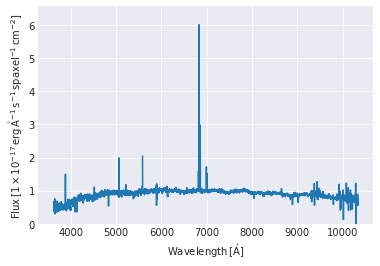

In [21]:
spectrum.plot(show_std=True)

<a id="associates"></a>
### Accessing Associated Objects

For a given target galaxy, there are many associated MaNGA Data Products from both the reduction and analysis pipelines.  Marvin seamlessly connects these together so you don't have to access them individually.  Let's access the DAP Maps objects associated with our cube.  To do so we use the ``getMaps`` method on ``cube``.  All instances have ``getXXX`` methods that allow you to access associated data objects for a given target.  

In [22]:
# access the Maps object from our cube
maps = cube.getMaps()
maps

<Marvin Maps (plateifu='8485-1901', mode='local', data_origin='db', bintype='HYB10', template='GAU-MILESHC')>

When accessing associated objects, Marvin also smartly determines whether to open the file locally or remotely grab it over the API.  In our case, the **mode** is local and **data_origin** is file.  DAP Maps have different bintypes.  The default binning is **HYB10**, a hybrid binning scheme to S/N~10.  To load a different bintype, use the ``bintype`` keyword argument in the ``cube.getMaps`` method.    

A ``Maps`` behaves very similarly to a ``Cube`` and everything we have discussed above will still work. Instead of datacubes and spectra, a ``Maps`` object contains a set of 2D quantities called ``Map``, each one of them representing a different property measured by the DAP. One can get a full list of all the properties available using the datamodel.

In [23]:
# look at the datamodel for the maps
maps.datamodel

[<Property 'spx_skycoo', channel='on_sky_x', release='2.2.1', unit='arcsec'>,
 <Property 'spx_skycoo', channel='on_sky_y', release='2.2.1', unit='arcsec'>,
 <Property 'spx_ellcoo', channel='elliptical_radius', release='2.2.1', unit='arcsec'>,
 <Property 'spx_ellcoo', channel='r_re', release='2.2.1', unit=''>,
 <Property 'spx_ellcoo', channel='elliptical_azimuth', release='2.2.1', unit='deg'>,
 <Property 'spx_mflux', channel='None', release='2.2.1', unit='1e-17 erg / (cm2 s spaxel)'>,
 <Property 'spx_snr', channel='None', release='2.2.1', unit=''>,
 <Property 'binid', channel='binned_spectra', release='2.2.1', unit=''>,
 <Property 'binid', channel='stellar_continua', release='2.2.1', unit=''>,
 <Property 'binid', channel='em_line_moments', release='2.2.1', unit=''>,
 <Property 'binid', channel='em_line_models', release='2.2.1', unit=''>,
 <Property 'binid', channel='spectral_indices', release='2.2.1', unit=''>,
 <Property 'bin_lwskycoo', channel='lum_weighted_on_sky_x', release='2.2.1',

Note that some properties such as ``spx_skycoo`` have multiple channels (in this case the ``on-sky`` ``x`` and ``y`` coordinates). To access the individual property, simply combine the property name and the channel name with an underscore, i.e. ``spx_skycoo_on_sky_x``.  As before, we can get more information about a property using the ``description`` attribute.  

In [24]:
print('spx_skycoo_on_sky_x: ', maps.datamodel.spx_skycoo_on_sky_x.description)

spx_skycoo_on_sky_x:  Offsets of each spaxel from the galaxy center. Channel = On-sky X.


More information about Marvin datamodels can be found [here](https://sdss-marvin.readthedocs.io/en/stable/datamodel/datamodels.html).  See the [DR15 Datamodel](https://sdss-marvin.readthedocs.io/en/stable/datamodel/dr15.html#datamodel-dr15) for a full description of the available datamodels for DR15.  

We can retrieve the map associated to a specific property directly from the Maps instance. For example, let’s get the Hα emission line flux (fitted by a Gaussian).  As ``Map`` quantities are similar to ``DataCube``, we can easily plot the 2d map. 

In [25]:
# grab the map of H-alpha emission line flux
ha = maps.emline_gflux_ha_6564
print(ha)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 1e-17 erg / (cm2 s spaxel)


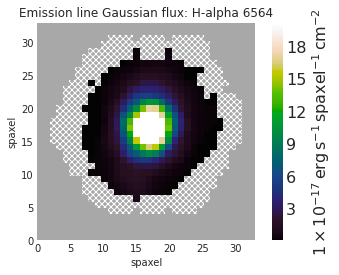

In [26]:
# plot the H-alpha map
fig, ax = ha.plot()

Note that the ``plot`` method returns the matplotlib ``Figure`` and ``Axes`` for the plot. We can use those to modify or save the plot. Marvin plotting routines try to select the best parameters, colour maps, and dynamic ranges. You can modify those by passing extra arguments to plot. You can learn more in the [Map plotting section](https://sdss-marvin.readthedocs.io/en/stable/tools/utils/plot-map.html#marvin-utils-plot-map). We will talk about the Map class in detail in Working with [Astropy Quantities](https://sdss-marvin.readthedocs.io/en/stable/getting-started.html#marvin-quantities) and in [Map](https://sdss-marvin.readthedocs.io/en/stable/tools/map.html#marvin-map).

Remember that all associated objects are connected together.  They can be accessed either from within an object instance or loaded independently from the class itself.  From within an instance, the core tools, ``Maps``, ``RSS``, and ``ModelCube`` are available using the ``getXXX`` methods, as well as additional auxillary tools and object data, such as ``Image``.         

In [27]:
# load the same Maps object by itself
from marvin.tools import Maps
my_maps = Maps('8485-1901')
my_maps

# get the stellar velocity map
stvel = my_maps.stellar_velocity

<WCSAxes:>

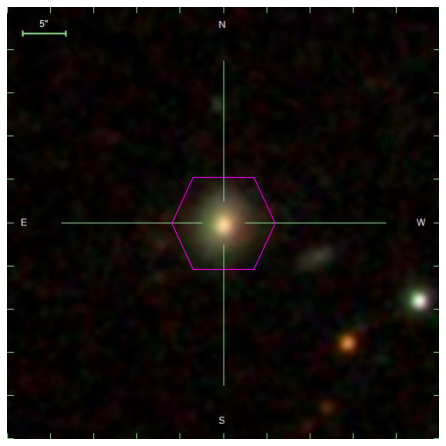

In [28]:
# load an auxilliary tool, the gri color image of the target galaxy using the Marvin Image tool

# get the Image of the galaxy and plot it
image = cube.getImage()
image.plot()

<a id="flags"></a>
### Quality and Target Flags and Maskbits
Each MaNGA target has associated quality assurance flags as well targeting flags.  Quality flags indiciate the overall quality of the data and/or any problems with the data discovered during the reduction and analysis pipeline runs.    

In [29]:
# look at the overall cube quality flags
cube.quality_flag

<Maskbit 'MANGA_DRP3QUAL' []>

In this case the MANGA_DRP3QUAL maskbit does not have any bit activated, which means the data is safe to use. See the [Maskbits](https://sdss-marvin.readthedocs.io/en/stable/tools/utils/maskbit.html#marvin-maskbit) section for more information on how to interact with Marvin Maskbits.

The targeting flags highlight the **targeting bits** set for this galaxy and tell you which sample the target belongs to.

In [30]:
# look at the targeting flags for this galaxy
cube.target_flags

[<Maskbit 'MANGA_TARGET1' ['SECONDARY_v1_1_0', 'SECONDARY_COM2', 'SECONDARY_v1_2_0']>,
 <Maskbit 'MANGA_TARGET2' []>,
 <Maskbit 'MANGA_TARGET3' []>]

Note that in this case the galaxy belongs to the secondary sample from the final target selection (``SECONDARY_v1_2_0``) as well as to the secondary samples from several commissioning target selections. The galaxy does not have any ancillary bit (**manga_target3**).  An **manga_target3** bit set indicates the target belongs to one of the [MaNGA Ancillary programs](https://www.sdss.org/dr15/manga/manga-target-selection/ancillary-targets/).  

<a id="mixin"></a>
### NSA, DAPall, and Value-Added catalog data
For each target we can also access additional catalog data: the associated parameters from the [NASA Sloan Atlas](http://nsatlas.org/), and the [DAPall](https://www.sdss.org/dr15/manga/manga-data/catalogs/#DAPALLFile) file.  The NSA catalog contains measured global galaxy photometric and shape profile information, while the DAPall catalog contains aggregrate statistics as measured by the MaNGA DAP pipeline.  NSA properties are available on all Marvin objects under the ``nsa`` attribute.  DAPall properties are available on all Marvin ``Maps`` and ``Modelcube`` objects.  

In [31]:
# look at the NSA properties for this galaxy from the cube instance
nsa = cube.nsa
nsa

{'iauname': 'J153010.73+484124.8',
 'field': 145,
 'run': 3225,
 'camcol': 2,
 'version': 'v1_0_1',
 'nsaid': 221394,
 'nsaid_v1b': -999,
 'z': 0.0407447,
 'zdist': 0.0412014,
 'sersic_absmag': [-14.2599,
  -15.9543,
  -17.0904,
  -18.2817,
  -18.9128,
  -19.2697,
  -19.5088],
 'elpetro_absmag': [-14.3422,
  -15.7994,
  -17.0133,
  -18.1788,
  -18.775,
  -19.1125,
  -19.3132],
 'elpetro_amivar': [1.39298,
  52.442,
  188.696,
  2311.74,
  2362.19,
  2158.28,
  909.175],
 'sersic_mass': 4259420000.0,
 'elpetro_mass': 3676850000.0,
 'elpetro_ba': 0.87454,
 'elpetro_phi': 154.873,
 'extinction': [0.11668,
  0.115132,
  0.0725557,
  0.0533858,
  0.0387198,
  0.0293601,
  0.0208166],
 'elpetro_th50_r': 1.33067,
 'petro_th50': 1.32995,
 'petro_flux': [2.42345, 7.63147, 33.5316, 103.177, 187.303, 266.833, 320.63],
 'petro_flux_ivar': [0.261188,
  0.978818,
  0.357724,
  4.59488,
  1.37015,
  0.156463,
  0.0512794],
 'elpetro_flux': [2.9988, 10.9678, 33.184, 104.279, 189.074, 266.311, 329.502]

In [32]:
# look at the DAP all properties from the maps instance
maps.dapall

{'plate': 8485,
 'ifudesign': 1901,
 'plateifu': '8485-1901',
 'mangaid': '1-209232',
 'drpallindx': 3991,
 'mode': 'CUBE',
 'daptype': 'HYB10-GAU-MILESHC',
 'dapdone': 'true',
 'objra': 232.545,
 'objdec': 48.6902,
 'ifura': 232.545,
 'ifudec': 48.6902,
 'mngtarg1': 2336,
 'mngtarg2': 0,
 'mngtarg3': 0,
 'z': 0.0407447,
 'ldist_z': 125.951,
 'adist_z': 116.282,
 'nsa_z': 0.0407447,
 'nsa_zdist': 0.0412014,
 'ldist_nsa_z': 125.951,
 'adist_nsa_z': 116.282,
 'nsa_elpetro_ba': 0.87454,
 'nsa_elpetro_phi': 154.873,
 'nsa_elpetro_th50_r': 1.33067,
 'nsa_sersic_ba': 0.773047,
 'nsa_sersic_phi': 163.295,
 'nsa_sersic_th50': 1.27748,
 'nsa_sersic_n': 3.29617,
 'versdrp2': 'v2_4_3',
 'versdrp3': 'v2_4_3',
 'verscore': 'v1_6_2',
 'versutil': 'v5_5_32',
 'versdap': '2.2.1',
 'drp3qual': 0,
 'dapqual': 0,
 'rdxqakey': 'SNRG',
 'binkey': 'HYB10',
 'sckey': 'GAU-MILESHC',
 'elmkey': 'EMOMM',
 'elfkey': 'EFITMDB',
 'sikey': 'INDXEN',
 'bintype': 'voronoi',
 'binsnr': 10.0,
 'tplkey': 'MILESHC',
 'da

SDSS members produce Value-Added Catalogs (VACS) of MaNGA products.  These products can be incorporated into Marvin.  Any incorporated VACS in Marvin are contained in the ``vacs`` attribute attached to each tool.  More information on VACs in Marvin can be found [here](https://sdss-marvin.readthedocs.io/en/stable/tools/catalogues.html#value-added-catalogs-vacs).  Currently the MaNGA-HI VAC for DR15 has been contributed into Marvin.  Let's take a look at it.  

In [33]:
# access the available VACs for this object
vacs = cube.vacs
vacs

<VACContainer ('firefly', 'galaxyzoo', 'gema', 'HI', 'visual_morphology')>

**vacs** is a container (list) of all names of the vacs contributed into Marvin.  These names are dottable to access to vac data.  These contributed custom products can be of any format chosen by the VAC owner, a Python class, a dictionary, an array, etc.  

In [35]:
# access the mangahi vac
hi = vacs.HI
print(hi)
print('data type:', type(hi))

# access any HI data available for 8485-1901
hi.data

Target(8485-1901)
data type: <class 'marvin.contrib.vacs.hi.HITarget'>


'No data exists for 8485-1901'

Let's load HI data for another galaxy

In [37]:
c = Cube('7443-12701')
hi = c.vacs.HI
print(hi)
print(hi.data)

Exception ignored in: <function MarvinToolsClass.__del__ at 0x7fa7e80e6310>
Traceback (most recent call last):
  File "/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/marvin/tools/core.py", line 253, in __del__
    self.close()
  File "/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/marvin/tools/core.py", line 240, in close
    if self.source_is_fits_hdulist:
AttributeError: 'Cube' object has no attribute 'source_is_fits_hdulist'


Target(7443-12701)
[('7443-12701', '12-98126', 230.5074624, 43.53234133, 6139, '16A-14', 767.4, 1.76, 8.82, -999., -999., -999., -999., -999, -999., -999, -999, -999, -999, -999, -999., -999., -999., -999., -999., -999.)]


We can plot the HI spectrum for the object with the `plot_spectrum` method.

<AxesSubplot:title={'center':'7443-12701'}, xlabel='$\\mathrm{Velocity}\\,[$$\\mathrm{\\frac{km}{s}}$$]$', ylabel='$\\mathrm{HI\\ Flux}\\,[$$\\mathrm{Jy}$$]$'>

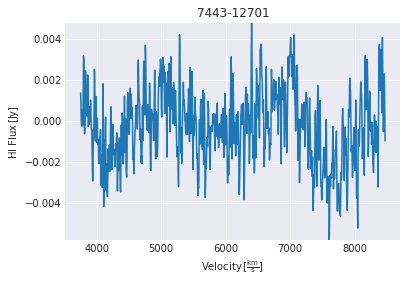

In [38]:
hi.plot_spectrum()

<a id="spaxels"></a>
### Interacting with Spaxels
All of the core Marvin Galaxy Tools have the ability to extract one ore more ``Spaxel`` objects.  ``Spaxel`` objects are special Marvin objects to make it easier to deal with individual spaxels in galaxies and access their properties.  See the [Getting Started with Spaxels](https://sdss-marvin.readthedocs.io/en/stable/tools/spaxel.html#marvin-spaxel) for more information on how to interact with ``Spaxels``.  We can either use the standard array slicing notation (0-indexed, origin of coordinates in the lower left corner of the array)

In [39]:
# extract the spaxel at array index x=10, y=15
spaxel = cube[15, 10]
spaxel

<Marvin Spaxel (plateifu=8485-1901, x=10, y=15; x_cen=-7, y_cen=-2, loaded=cube)>

or we can use ``getSpaxel`` method, which accepts multiple arguments. Note that by default, (x, y) coordinates passed to ``getSpaxel`` are measured from the center of the array.

In [40]:
# get the spaxel at the center of the target galaxy
central_spaxel = cube.getSpaxel(x=0, y=0)
central_spaxel

<Marvin Spaxel (plateifu=8485-1901, x=17, y=17; x_cen=0, y_cen=0, loaded=cube)>

<AxesSubplot:xlabel='$\\mathrm{Wavelength}\\,[$$\\mathrm{\\mathring{A}}$$]$', ylabel='$\\mathrm{Flux}\\,[$$\\mathrm{1 \\times 10^{-17}\\,erg\\,\\mathring{A}^{-1}\\,s^{-1}\\,spaxel^{-1}\\,cm^{-2}}$$]$'>

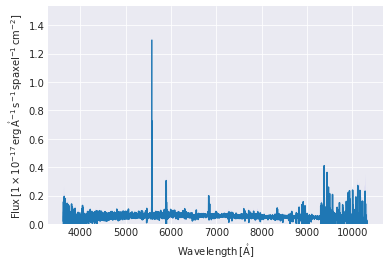

In [41]:
# we can plot the spectrum of the spaxel
spaxel.flux.plot()

### Additional Resources

- Go through the [Lean Tutorial](https://sdss-marvin.readthedocs.io/en/latest/tutorials/lean-tutorial.html#marvin-lean-tutorial)
- Learn more [Plotting Techniques](https://sdss-marvin.readthedocs.io/en/latest/tutorials/plotting-tutorial.html)
- Dig into the [Galaxy Tools](https://sdss-marvin.readthedocs.io/en/latest/tools/index.html) in more detail.
- Try out [Marvin Queries](https://sdss-marvin.readthedocs.io/en/latest/query/index.html)